In [4]:
# !pip install selenium

In [5]:
# !pip install beautifulsoup4

In [6]:
# !pip install textblob

In [1]:
from selenium import webdriver  
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Opening Chrome Browser and visting the site

In [2]:
# change the chrome.exe and chromedrive.exe path according to your system

CHROME_PATH = r'C:\Users\Mizgaan\AppData\Local\Google\Chrome\Application\chrome.exe'
CHROMEDRIVER_PATH = r'C:\Users\Mizgaan\chromedriver_win32\chromedriver.exe'
# WINDOW_SIZE = "1920,1080"

In [3]:
# chrome_options = Options()
# chrome_options.add_argument("--headless")
# chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
# chrome_options.binary_location = CHROME_PATH

In [4]:
browser = webdriver.Chrome(executable_path=CHROMEDRIVER_PATH)
browser.maximize_window()

In [5]:
# Naviagte to IMDB site
browser.get("https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm")
films=[]

# this loop decides no. of movies to fetech    
for i in range(1,5):
    # feteching the list of movies
    
    xpath="//*[@id='main']/div/span/div/div/div[3]/table/tbody/tr["+str(i)+"]/td[2]/a"
    
    #url
    films.append([browser.find_element_by_xpath(xpath).get_attribute("href")])   # Fetching the url & title of the movie

In [6]:
len(films)

4

In [7]:
for film in films:  
    browser.get(film[0])
    try:
        # getting the title 
        film.append(browser.find_element_by_xpath('//*[@id="title-overview-widget"]/div[1]/div[2]/div/div[2]/div[2]/h1').text)
         # getting the length_of_the_movie
        film.append(browser.find_element_by_xpath("//*[@id='title-overview-widget']/div[1]/div[2]/div/div[2]/div[2]/div/time").text)
        # Type of Movie
        film.append(browser.find_element_by_xpath("//*[@id='title-overview-widget']/div[1]/div[2]/div/div[2]/div[2]/div/a[1]").text)
        #date
        film.append(browser.find_element_by_xpath('//*[@id="titleYear"]').text)
    except:
        pass

        

In [8]:
for f in films[:]:
    print(f[0])

https://www.imdb.com/title/tt12361974/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=ea4e08e1-c8a3-47b5-ac3a-75026647c16e&pf_rd_r=0SW5Y7461QS82EYNSGAX&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_tt_1
https://www.imdb.com/title/tt6802400/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=ea4e08e1-c8a3-47b5-ac3a-75026647c16e&pf_rd_r=0SW5Y7461QS82EYNSGAX&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_tt_2
https://www.imdb.com/title/tt0974015/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=ea4e08e1-c8a3-47b5-ac3a-75026647c16e&pf_rd_r=0SW5Y7461QS82EYNSGAX&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_tt_3
https://www.imdb.com/title/tt9130508/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=ea4e08e1-c8a3-47b5-ac3a-75026647c16e&pf_rd_r=0SW5Y7461QS82EYNSGAX&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_tt_4


In [9]:
# from selenium.webdriver.common.action_chains import ActionChains

# reviews=[]
# for f in films[:]:
    
#     browser.get(f[0])  ## Link of the movie
#     link = browser.find_element_by_link_text('USER REVIEWS')
#     link.click()
#     time.sleep(2)
    
    
# #     Lm=browser.find_element_by_class_name("ipl-load-more__button").text()
# #     if lm=='Load More':
# #     browser.find_element_by_class_name("ipl-load-more__button").click()
# #     time.sleep(2)
        
# #     else:
# #         pass
# #     menu= browser.find_elements_by_xpath("//div[@class='header']")
# #     ActionChains(browser).move_to_element(browser.find_elements_by_xpath("//div[@class='header']")).click(browser.find_elements_by_xpath("//div[@class='header']")).perform()
    
    
#     rev=browser.find_elements_by_class_name("review-container")
    
#     for i in rev:
#         try:                                                    # feteching details inside the review container
#             review=[]
#             #movie_name
#             review.append(f[1])  # Name of the movie
#             #username
#             review.append(browser.find_element_by_xpath("//*[@class='display-name-link']").text)
#             #date_review
#             review.append(browser.find_element_by_xpath("//*[@class='display-name-link']/following::*[1]").text)
#             #title_review
#             review.append(rev.find_element_by_class_name("title").text)
#             #comment
#             review.append(browser.find_element_by_xpath("//*[contains(@class, 'text show-more__control')]").text)
#             reviews.append(review)
#         except:
#             pass
        
        
    

In [10]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
reviews=[]
for f in films[:]:
    
    browser.get(f[0])  ## Link of the movie
    link = browser.find_element_by_link_text('USER REVIEWS')
    link.click()
                                            #load mores-----> For Loading more Numbers of review Comment we can increase the loop
#     for i in range(0,1):
#         try:
#             browser.find_element_by_class_name("ipl-load-more__button").click()
#             time.sleep(2)
#         except:
#             break
    actions = ActionChains(browser)
    actions.send_keys(Keys.PAGE_DOWN)
    actions.perform()                                                              
    time.sleep(1)
    actions = ActionChains(browser)
    actions.send_keys(Keys.PAGE_UP)
    actions.perform()  
    time.sleep(1)
                                                                            # contains all the comments-review
    revs= browser.find_elements_by_class_name("review-container")
#   
    c=0
    for rev in revs:
        c+=1
#         time.sleep(1)
        try:                                                    # feteching details inside the review container
            ho=[]
            #movie_name
            review.append(f[1])  # Name of the movie
            #username
            review.append(rev.find_element_by_class_name("display-name-link").text)
            #date_review
            review.append(rev.find_element_by_class_name("review-date").text)
            #title_review
            review.append(rev.find_element_by_class_name("title").text)
            #comment
            review.append(rev.find_element_by_xpath("(//*[contains(@class, 'text show-more__control')])["+str(c)+"]").text)
            reviews.append(review)
        except:
            pass

In [11]:
len(revs)

25

In [12]:
len(reviews)

100

In [20]:
# type(reviews)

# df=pd.DataFrame(review,columns=['reviews'])

## Analyzing the Data Before Cleaning

In [13]:
reviews

[["Zack Snyder's Justice League (2021)",
  'saayanbiswas',
  '18 March 2021',
  'Restoring the Synderverse is Essential Now!',
  "The movie will make us connected with Victor Stone and Clark Kent very deeply. I felt goosebumps and even got a bit emotional at a few points. It's a must watch for all superhero movie lovers. The release of this movie is revolutionary and hats off to Zack Snyder. Now I'm eagerly waiting for the Synderverse to be restored."],
 ["Zack Snyder's Justice League (2021)",
  'rajon07',
  '18 March 2021',
  'This is the Justice League movie we deserve',
  'As a life long comic fan, DC characters are more close to my heart than Marvel characters. The first making of this film was just disappointing. It seems like there are bunch of idiots sitting on the WB executive positions who have no vision at all. The first film was literally incomplete. This one tells the full story and I must say nicely. This is the movie we, all the fans wanted and deserve.'],
 ["Zack Snyder'

In [14]:
(reviews[0][4])

"The movie will make us connected with Victor Stone and Clark Kent very deeply. I felt goosebumps and even got a bit emotional at a few points. It's a must watch for all superhero movie lovers. The release of this movie is revolutionary and hats off to Zack Snyder. Now I'm eagerly waiting for the Synderverse to be restored."

In [15]:
(reviews[1][4])

'As a life long comic fan, DC characters are more close to my heart than Marvel characters. The first making of this film was just disappointing. It seems like there are bunch of idiots sitting on the WB executive positions who have no vision at all. The first film was literally incomplete. This one tells the full story and I must say nicely. This is the movie we, all the fans wanted and deserve.'

In [24]:
browser.close()

# Preprocessing data

In [16]:
# Calling DataFrame constructor on list
df = pd.DataFrame(reviews,columns =['film', 'user','date','title_rev','reviews'])

In [17]:
df.head()

,film,user,date,title_rev,reviews
0,Zack Snyder's Justice League (2021),saayanbiswas,18 March 2021,Restoring the Synderverse is Essential Now!,The movie will make us connected with Victor S...
1,Zack Snyder's Justice League (2021),rajon07,18 March 2021,This is the Justice League movie we deserve,"As a life long comic fan, DC characters are mo..."
2,Zack Snyder's Justice League (2021),RinoBortone91,19 March 2021,JUSTICE FOR THE JUSTICE LEAGUE HAS BEEN SERVED,Zack Snyder's Justice League is one of the bes...
3,Zack Snyder's Justice League (2021),eloybeugelink,18 March 2021,Superheroes Unite!,"Yesss, thank you Zack Snyder! THIS is the movi..."
4,Zack Snyder's Justice League (2021),obaashaolu,18 March 2021,We need this to be cannon,


In [18]:
df.tail()

,film,user,date,title_rev,reviews
95,Cherry (2021),Xstal,17 March 2021,No Cherry on this Cake...,... or icing for that matter. Fabulously forge...
96,Cherry (2021),ijmontalvo,12 March 2021,Amazing,Great movie. Proud of tom and the rest of the ...
97,Cherry (2021),darrel076,13 March 2021,BELIEVABLE ADDICT. GOOD MOVIE.,His acting as a junkie is on point. The movie ...
98,Cherry (2021),kurtisbeacroft,13 March 2021,Outstanding..!,"Outstanding, there it is, noting more to add b..."
99,Cherry (2021),ozorjustin,15 March 2021,Not for the faint hearted,This movie is a 7/10 no doubt but those perfor...


In [19]:
pd.DataFrame(df['reviews']).head()

,reviews
0,The movie will make us connected with Victor S...
1,"As a life long comic fan, DC characters are mo..."
2,Zack Snyder's Justice League is one of the bes...
3,"Yesss, thank you Zack Snyder! THIS is the movi..."
4,


In [20]:
len(df['reviews'])

100

In [21]:
### Conunting Number Of words in the reviews 

df['word_Count']=df['reviews'].apply(lambda x: len(x.split()))


In [184]:
# df['word_Count'].head()

In [22]:
### Counting Number Of Character in the reviews
# len(df['reviews'][0])

df['char_count']=df['reviews'].apply(lambda x:len(x))

In [23]:
### Counting Average words length

def avg_words(x):
    words=x.split()
    if len(words)!=0:        
#     print(words)
        return sum(len(word) for word in words)/len(words)
    else:
        pass

In [24]:
df['average_word_length']=df['reviews'].apply(lambda x: avg_words(x))

In [25]:
df.sample()

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length
8,Zack Snyder's Justice League (2021),monjura-07580,22 March 2021,Can we please get Justice League 2?!,Zack Snyder's Justice League was an amazing mo...,42,228,4.428571


In [5]:
from nltk.corpus import stopwords

stop_words=stopwords.words('english')

In [27]:
len(stop_words)

179

In [6]:
x='Zack Snyders Justice League was an amazing mo'
len([word  for word in x.split() if word.lower() in stop_words])

2

In [28]:
# Checking Number of StopWords in the review

df['stop_words_count']=df['reviews'].apply(lambda x: len([word  for word in x.split() if word.lower() in stop_words]))

In [29]:
# df['stop_words'].head()

df['stop_word_rate']=df['stop_words_count']/df['word_Count']


In [192]:
# df.columns.drop('stop_words')

In [30]:
df.head()

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate
0,Zack Snyder's Justice League (2021),saayanbiswas,18 March 2021,Restoring the Synderverse is Essential Now!,The movie will make us connected with Victor S...,59,324,4.508475,27,0.457627
1,Zack Snyder's Justice League (2021),rajon07,18 March 2021,This is the Justice League movie we deserve,"As a life long comic fan, DC characters are mo...",74,398,4.391892,34,0.459459
2,Zack Snyder's Justice League (2021),RinoBortone91,19 March 2021,JUSTICE FOR THE JUSTICE LEAGUE HAS BEEN SERVED,Zack Snyder's Justice League is one of the bes...,373,2212,4.932976,173,0.463807
3,Zack Snyder's Justice League (2021),eloybeugelink,18 March 2021,Superheroes Unite!,"Yesss, thank you Zack Snyder! THIS is the movi...",57,343,5.017544,21,0.368421
4,Zack Snyder's Justice League (2021),obaashaolu,18 March 2021,We need this to be cannon,,0,0,NaN,0,NaN


In [31]:
df.sort_values(by='stop_word_rate') ##less stopword more valuable information

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate
12,Zack Snyder's Justice League (2021),vprajapat,23 March 2021,"WB, Are You drunk","Restore Snyderverse, Otherwise Boycott All WB ...",7,53,6.714286,1,0.142857
20,Zack Snyder's Justice League (2021),suryajijvania,18 March 2021,More Parts,"It's master piece by Zack please part 2,3,4 al...",14,71,4.142857,3,0.214286
8,Zack Snyder's Justice League (2021),monjura-07580,22 March 2021,Can we please get Justice League 2?!,Zack Snyder's Justice League was an amazing mo...,42,228,4.428571,11,0.261905
22,Zack Snyder's Justice League (2021),moizsyed-07601,18 March 2021,Awesome out standing!,Far better than previous one and better editin...,10,60,5.100000,3,0.300000
70,Justice League (2017),snyperbladeaq,20 March 2021,Warner Brothers have no vision,Watch the Zack Snyder's cut that movie makes s...,36,199,4.555556,12,0.333333
...,...,...,...,...,...,...,...,...,...,...
67,Justice League (2017),luan-penna,16 November 2017,Just okay,,0,0,NaN,0,NaN
73,Justice League (2017),ig-bic,14 November 2017,"Every One Star or Ten Star is a lie, it's a go...",,0,0,NaN,0,NaN
74,Justice League (2017),garethvk,15 November 2017,Better Than Expected But Deeply Flawed,,0,0,NaN,0,NaN
76,Cherry (2021),gotdayummm,18 March 2021,"As a 2004 Iraq War Vet, This hits home.",,0,0,NaN,0,NaN


#### Statistical Analysis

In [32]:
df.describe()

,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate
count,100.000000,100.000000,79.000000,100.000000,79.000000
mean,85.270000,476.670000,4.548867,39.730000,0.444876
std,150.624347,858.354487,0.466913,71.928114,0.072019
min,0.000000,0.000000,3.416667,0.000000,0.142857
25%,13.250000,67.500000,4.290894,4.000000,0.407929
50%,40.000000,219.500000,4.508475,18.500000,0.458333
75%,71.750000,398.500000,4.782177,34.500000,0.493026
max,1008.000000,5838.000000,6.714286,484.000000,0.555556


## Cleaning and Data Preprocessing

### Removing the Specials Character, Removing Unicode,Removing URL,Removing HASH Tags,Removing Number
### Removing Punctuation,Repair Elongated Words,Removing Stopwords,Removing Single Characters etc.

In [480]:
# df['clean_review'].apply(lambda x: ''(word.lower() for word in x.split()) )

In [34]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class IMDBPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self        
#        self.text =' '.join([text.lower() for word in text.split()])


In [35]:
# Clean tweets and append to new column
IMDB = df['reviews']
clean_review = []
for cmmt in IMDB:
    c = IMDBPreprocessor((cmmt))
    c.fully_preprocess()
    c = c.text
    clean_review.append(c)

df['clean_review'] = clean_review     # taking the words having whose size >3
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head(5)

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate,clean_review
0,Zack Snyder's Justice League (2021),saayanbiswas,18 March 2021,Restoring the Synderverse is Essential Now!,The movie will make us connected with Victor S...,59,324,4.508475,27,0.457627,movie make connected Victor Stone Clark Kent d...
1,Zack Snyder's Justice League (2021),rajon07,18 March 2021,This is the Justice League movie we deserve,"As a life long comic fan, DC characters are mo...",74,398,4.391892,34,0.459459,life long comic characters close Marvel charac...
2,Zack Snyder's Justice League (2021),RinoBortone91,19 March 2021,JUSTICE FOR THE JUSTICE LEAGUE HAS BEEN SERVED,Zack Snyder's Justice League is one of the bes...,373,2212,4.932976,173,0.463807,Zack Snyders Justice League bestmade successfu...
3,Zack Snyder's Justice League (2021),eloybeugelink,18 March 2021,Superheroes Unite!,"Yesss, thank you Zack Snyder! THIS is the movi...",57,343,5.017544,21,0.368421,Yesss thank Zack Snyder THIS movie heroes dese...
4,Zack Snyder's Justice League (2021),obaashaolu,18 March 2021,We need this to be cannon,,0,0,NaN,0,NaN,


In [50]:
# Visualzing and comparing the comments after cleaning
df[['reviews','clean_review']][:10] 

,reviews,clean_review
0,The movie will make us connected with Victor S...,movie make connected victor stone clark kent d...
1,"As a life long comic fan, DC characters are mo...",life long comic characters close marvel charac...
2,Zack Snyder's Justice League is one of the bes...,zack snyders justice league bestmade successfu...
3,"Yesss, thank you Zack Snyder! THIS is the movi...",yesss thank zack snyder this movie heroes dese...
4,,
5,No words can describe the experience. Seeing a...,words describe experience seeing struggle come...
6,Zack Snyder delivers by far his best film with...,zack snyder delivers best film justice league ...
7,I am so happy that this film filled all the br...,happy film filled broken points justice league...
8,Zack Snyder's Justice League was an amazing mo...,zack snyders justice league amazing movie this...
9,"The longer they are, the more time they get to...",longer time story pace perfect stories charact...


In [37]:
## After Cleaning the Reviews Some Words Are not Converted into LowerCase

df['clean_review']=df['clean_review'].apply(lambda x: ' '.join (word.lower() for word in x.split()) )

In [148]:
# df[['reviews','clean_review','lowerclean_review']][:4]

In [38]:
df.sample(5) ## Getting random data

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate,clean_review
79,Cherry (2021),sammybeno,15 March 2021,Pretty damn good,I don't understand the low ratings. All this f...,39,212,4.461538,20,0.512821,dont understand ratings film show much range h...
27,Coming 2 America (2021),debellum,7 March 2021,Not good,Best thing about this movie is that it brings ...,27,147,4.481481,13,0.481481,best thing movie brings back actors worst thin...
91,Cherry (2021),meribelmerisaar,12 March 2021,I LOVE IT 10/10,It was really touching to see everything he an...,17,89,4.294118,7,0.411765,really touching everything emily went love movie
32,Coming 2 America (2021),yaplex,8 March 2021,Can't watch this movie,It is not funny at all. Nothing comparing to t...,15,82,4.533333,7,0.466667,funny nothing comparing original movie jokes s...
21,Zack Snyder's Justice League (2021),shishirkmr-82243,18 March 2021,It's a fantastic movie,No words to describe. It's awesome. One of the...,14,73,4.285714,6,0.428571,words describe awesome best superhero would


In [39]:
# df.to_csv('IMDB_Reviews.csv')
df['word_Count'].sum()

8527

####  Classified the sentiment into Great, Good, Bad & Worst

In [40]:
from textblob import TextBlob
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['clean_review']]
sentiment_category_tb = [4 if score >= 0.5 and score<=1  # great
                             else 3 if score >= 0 and score<0.5 #good
                             else 2 if score >= -0.5 and score <0 #bad
                                 else 1 # worst
                                     for score in sentiment_scores_tb]
df["sentiment"]=sentiment_category_tb
df

,film,user,date,title_rev,reviews,word_Count,char_count,average_word_length,stop_words_count,stop_word_rate,clean_review,sentiment
0,Zack Snyder's Justice League (2021),saayanbiswas,18 March 2021,Restoring the Synderverse is Essential Now!,The movie will make us connected with Victor S...,59,324,4.508475,27,0.457627,movie make connected victor stone clark kent d...,3
1,Zack Snyder's Justice League (2021),rajon07,18 March 2021,This is the Justice League movie we deserve,"As a life long comic fan, DC characters are mo...",74,398,4.391892,34,0.459459,life long comic characters close marvel charac...,3
2,Zack Snyder's Justice League (2021),RinoBortone91,19 March 2021,JUSTICE FOR THE JUSTICE LEAGUE HAS BEEN SERVED,Zack Snyder's Justice League is one of the bes...,373,2212,4.932976,173,0.463807,zack snyders justice league bestmade successfu...,3
3,Zack Snyder's Justice League (2021),eloybeugelink,18 March 2021,Superheroes Unite!,"Yesss, thank you Zack Snyder! THIS is the movi...",57,343,5.017544,21,0.368421,yesss thank zack snyder this movie heroes dese...,4
4,Zack Snyder's Justice League (2021),obaashaolu,18 March 2021,We need this to be cannon,,0,0,NaN,0,NaN,,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cherry (2021),Xstal,17 March 2021,No Cherry on this Cake...,... or icing for that matter. Fabulously forge...,63,387,5.158730,24,0.380952,icing matter fabulously forgettable completely...,2
96,Cherry (2021),ijmontalvo,12 March 2021,Amazing,Great movie. Proud of tom and the rest of the ...,14,69,4.000000,7,0.500000,great movie proud rest cast they amazing,4
97,Cherry (2021),darrel076,13 March 2021,BELIEVABLE ADDICT. GOOD MOVIE.,His acting as a junkie is on point. The movie ...,51,253,3.980392,28,0.549020,acting junkie point movie aistic times still n...,3
98,Cherry (2021),kurtisbeacroft,13 March 2021,Outstanding..!,"Outstanding, there it is, noting more to add b...",39,206,4.307692,18,0.461538,outstanding noting dont want ruin anything any...,3


In [41]:
df['film'].unique()

array(["Zack Snyder's Justice League (2021)", 'Coming 2 America (2021)',
       'Justice League (2017)', 'Cherry (2021)'], dtype=object)

In [274]:
# s={}

# for i in ((df['film'].unique())):
#     s[i]=(df[df['film']==i]['reviews'])
    
# s

In [42]:
t=(df[df['film']=='Coming 2 America (2021)']['clean_review'])
pd.DataFrame(t)

,clean_review
25,good godthis terrible movie made halfway could...
26,movie looks cheap obvious there charm like ori...
27,best thing movie brings back actors worst thin...
28,appreciate plethora cast returned sequel humor...
29,movie awful still good deal thought coming lis...
30,this film actually soul watch havent watched a...
31,never expected better original even close even...
32,funny nothing comparing original movie jokes s...
33,
34,only good barbershop scene this movie needed d...


## Visualizing the sentimental words after polarizing

C:\Users\Mizgaan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


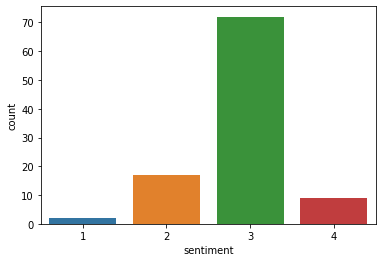

In [45]:
import seaborn as sns

sns.countplot(x='sentiment', data=df)

In [47]:
great_words = df['word_Count'][df.sentiment == 4]
good_words = df['word_Count'][df.sentiment == 3]
bad_words = df['word_Count'][df.sentiment == 2]
worst_words = df['word_Count'][df.sentiment == 1]

C:\Users\Mizgaan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


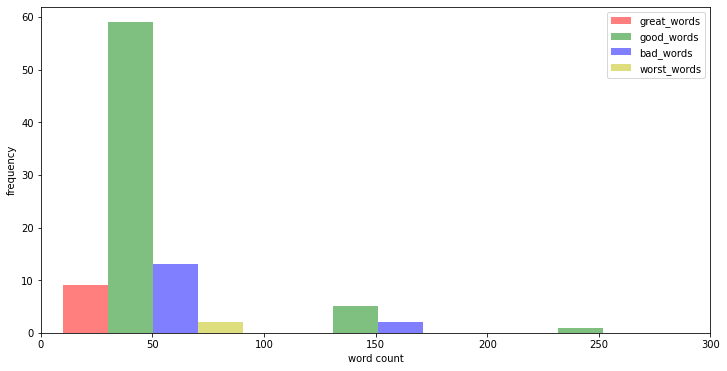

In [48]:
import matplotlib.pyplot as plt
# %matplotlib

plt.figure(figsize=(12,6))
plt.xlim(0, 300, 5)
plt.xlabel('word count')
plt.ylabel('frequency')
plt.hist([great_words, good_words, bad_words,worst_words], color=['r', 'g', 'b','y'], alpha=0.5, label=['great_words', 'good_words', 'bad_words','worst_words'])
#plt.hist([pos_sen_len, neg_sen_len], color=['r', 'b'], alpha=0.5, label=['positive', 'negative'])
plt.legend(loc='upper right')

In [49]:
df['sentiment'].unique()

array([3, 4, 1, 2], dtype=int64)

# Importing The Library For  Building The Model

In [52]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Activation
from tensorflow.keras.layers import Dense,BatchNormalization,PReLU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [53]:
df['clean_review']

0     movie make connected victor stone clark kent d...
1     life long comic characters close marvel charac...
2     zack snyders justice league bestmade successfu...
3     yesss thank zack snyder this movie heroes dese...
4                                                      
                            ...                        
95    icing matter fabulously forgettable completely...
96             great movie proud rest cast they amazing
97    acting junkie point movie aistic times still n...
98    outstanding noting dont want ruin anything any...
99    this movie doubt performances enough drag holl...
Name: clean_review, Length: 100, dtype: object

### Converting to OneHot Representation

In [54]:
voc_size=50000
# onehot_repr=[one_hot(words,voc_size)for words in df[['clean_review','film','stop_word_rate','average_word_length','char_count','word_Count']]] 
onehot_repr=[one_hot(words,voc_size)for words in df['clean_review']]

print(onehot_repr[0])

[4680, 4903, 45065, 44880, 16875, 28323, 46535, 49072, 13351, 43053, 22741, 33679, 16881, 42976, 431, 8466, 4680, 9351, 1611, 4680, 3998, 37762, 40676, 12806, 14519, 47130, 9993, 44624]


### Padding 

In [61]:
sent_length= 100   # choosing scentence length depend upon the shape of dependent variable
embedding_vector_features=40 ## No.of Dimension for each word
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  4680  4903 45065 44880 16875 28323 46535 49072 13351 43053 22741 33679
 16881 42976   431  8466  4680  9351  1611  4680  3998 37762 40676 12806
 14519 47130  9993 44624]


In [56]:
y=df['sentiment']
# x=df[['clean_review','film','stop_word_rate','average_word_length','char_count','word_Count']]

In [57]:
## Parting the Dependent and Independent variables 


X_final=np.array(embedded_docs)
y_final=np.array(y)

In [58]:
print('Shape Of Dependent Variable: {a} & Shape of target Variable: {b}'.format(a=X_final.shape,b=y_final.shape),'\n')

Shape Of Dependent Variable: (100, 100) & Shape of target Variable: (100,) 



## MOdel BUilding 

### Model-I

In [62]:
model=Sequential()
# model.add(Embedding(len(word_index)+1, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Embedding(voc_size,embedding_vector_features,  input_length=sent_length))


model.add(LSTM(units=300, return_sequences=False, recurrent_dropout=0.2, dropout=0.2))
model.add(BatchNormalization())

model.add(Dense(200))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(200))
model.add(PReLU())
# model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(200))
model.add(PReLU())
# model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(200))
model.add(PReLU())
# model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=1))
model.add(Activation(activation='softmax'))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 40)           2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300)               409200    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense (Dense)                (None, 200)               60200     
_________________________________________________________________
p_re_lu (PReLU)              (None, 200)               200       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)              

In [65]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [66]:
# Splitting the Data For Training and Validating 


from sklearn.model_selection import train_test_split
X_train_text_indices, X_test_text_indices, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=20)  

In [67]:
history = model.fit(X_train_text_indices, y_train, epochs=50, batch_size=12, validation_data=(X_test_text_indices, y_test), shuffle=True)

Train on 90 samples, validate on 10 samples
Epoch 1/50
90/90 [==============================] - 18s 199ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 2/50
90/90 [==============================] - 8s 92ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 3/50
90/90 [==============================] - 9s 103ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 4/50
90/90 [==============================] - 9s 102ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 5/50
90/90 [==============================] - 8s 93ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 6/50
90/90 [==============================] - 9s 95ms/sample - loss: -28.2958 - accuracy: 0.0222 - val_loss: -32.0234 - val_accuracy: 0.0000e+00
Epoch 7/50
90/90 [============================

In [ ]:
# print(model.predict(embedded_docs))

## Visualizing The Loss, Val_Loss, Accuracy ,Val_Accuracy

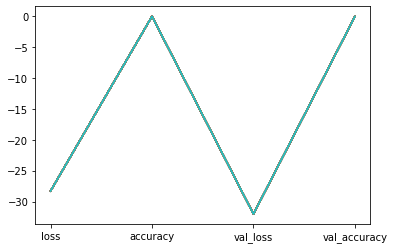

In [68]:
plt.plot(list(history.history.keys()),list(history.history.values()))

In [426]:
### Accuracy & Val_Accuracy

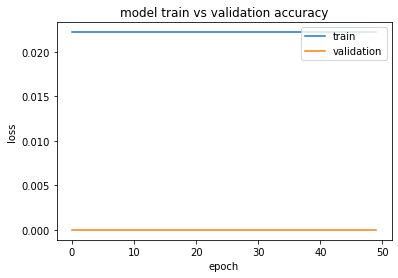

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Loss & Val_loss

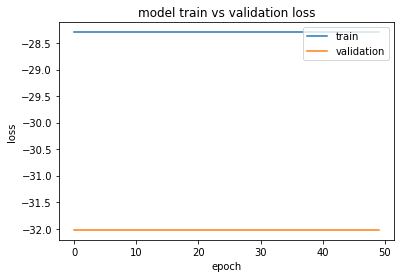

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [377]:
# df.columns

In [72]:
y_pred=model.predict_classes(X_dev_text_indices)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [7, 0, 0, 0],
       [2, 0, 0, 0]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       7.0
           4       0.00      0.00      0.00       2.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



C:\Users\Mizgaan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mizgaan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
accuracy_score(y_test,y_pred)

0.0

## Model- II

In [79]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),  optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"),
    
        metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 40)           2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 2,113,001
Trainable params: 2,113,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# tf.keras.losses.Hinge()
# tf.keras.losses.CategoricalCrossentropy()
# tf.keras.losses.SparseCategoricalCrossentropy()
# tf.keras.losses.KLDivergence()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=4)

In [81]:
history1=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=6)


Train on 80 samples, validate on 20 samples
Epoch 1/20
80/80 [==============================] - 11s 134ms/sample - loss: -17.3837 - accuracy: 0.0250 - val_loss: -33.5438 - val_accuracy: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 4s 50ms/sample - loss: -39.5580 - accuracy: 0.0250 - val_loss: -43.7468 - val_accuracy: 0.0000e+00
Epoch 3/20
80/80 [==============================] - 4s 50ms/sample - loss: -47.6053 - accuracy: 0.0250 - val_loss: -50.2164 - val_accuracy: 0.0000e+00
Epoch 4/20
80/80 [==============================] - 4s 50ms/sample - loss: -53.8066 - accuracy: 0.0250 - val_loss: -55.7590 - val_accuracy: 0.0000e+00
Epoch 5/20
80/80 [==============================] - 4s 50ms/sample - loss: -59.1881 - accuracy: 0.0250 - val_loss: -60.7522 - val_accuracy: 0.0000e+00
Epoch 6/20
80/80 [==============================] - 4s 49ms/sample - loss: -64.1764 - accuracy: 0.0250 - val_loss: -66.0270 - val_accuracy: 0.0000e+00
Epoch 7/20
80/80 [==============================

In [501]:
# history1.history

In [82]:
y_pred1=model1.predict_classes(X_test)


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)


array([[ 0,  0,  0,  0],
       [ 4,  0,  0,  0],
       [15,  0,  0,  0],
       [ 1,  0,  0,  0]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.0

In [552]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       3.0
           4       0.00      0.00      0.00       2.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



C:\Users\Mizgaan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mizgaan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


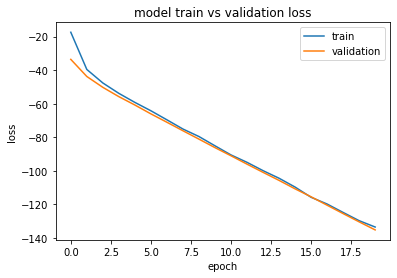

In [85]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


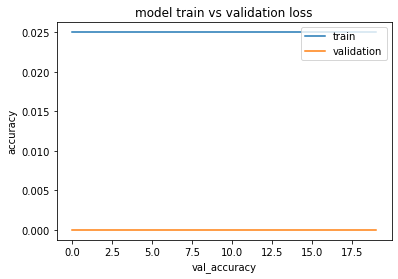

In [86]:
# (history).keys()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model train vs validation loss')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()